In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\Users\Avinash Matani\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('u_nsw_covid19.xlsx',)
print(df.shape)
df.head()

(267, 25)


,Date,Total Cases,Confirmed Cases,total_demand,keyword_trend,dew_point,T2M_MAX,T2M_MIN,WS50M_MIN,WS50M_MAX,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2020-01-25,3.0,3.0,396652.14,230.0,9.6,15.9,12.9,9.2,12.3,...,0.004348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,3.0,0.0,420022.54,214.0,8.8,12.9,11.1,7.7,9.6,...,0.004673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,4.0,1.0,411117.40,160.0,8.0,12.6,12.2,4.8,11.8,...,0.006250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,4.0,0.0,462230.19,165.0,9.0,12.5,10.4,5.2,12.4,...,0.006061,NaN,NaN,NaN,Mar,Apr,May,June,July,Aug
4,2020-01-29,4.0,0.0,428169.16,166.0,12.3,17.7,12.6,10.7,15.3,...,0.006024,NaN,NaN,Actual,1.09178e+07,9.96676e+06,1.12366e+07,1.21402e+07,NaN,NaN


In [3]:
df.columns

Index(['Date', 'Total Cases', 'Confirmed Cases', 'total_demand',
       'keyword_trend', 'dew_point', 'T2M_MAX', 'T2M_MIN', 'WS50M_MIN',
       'WS50M_MAX', 'avg_temp', 'relative_humidity', 'avg_wind_speed',
       'predicted demand', 'Demand Reduction', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [4]:
# apply log(x+1) element-wise to a subset of columns
to_log = ['Total Cases', 'Confirmed Cases', 'total_demand', 'keyword_trend',
       'dew_point', 'avg_temp', 'relative_humidity',
       'avg_wind_speed','Demand Reduction']
df_log = df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

# # shift the index
# df_log.index = df_log.index + 1

C:\Users\Avinash Matani\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\Avinash Matani\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [5]:
df_log

,log_Total Cases,log_Confirmed Cases,log_total_demand,log_keyword_trend,log_dew_point,log_avg_temp,log_relative_humidity,log_avg_wind_speed,log_Demand Reduction
0,1.386294,1.386294,12.890817,5.442418,2.360854,2.734368,4.291828,2.468100,NaN
1,1.386294,0.000000,12.948066,5.370638,2.282382,2.564949,4.400603,2.272126,NaN
2,1.609438,0.693147,12.926637,5.081404,2.197225,2.595255,4.322807,2.230014,7.735872
3,1.609438,0.000000,13.043820,5.111988,2.302585,2.525729,4.433195,2.282382,NaN
4,1.609438,0.000000,12.967276,5.117994,2.587764,2.778819,4.464758,2.639057,9.813874
...,...,...,...,...,...,...,...,...,...
262,8.365672,2.639057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,8.368925,2.708050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,8.371474,2.484907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,8.372630,1.791759,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_log

In [7]:
df.shape

(267, 9)

In [8]:
# df = df[['Date','Confirmed Cases', 'footfall', 'total_demand']]

In [9]:
for i in df:
    print(df[i].isna().sum(),i)

12 log_Total Cases
15 log_Confirmed Cases
17 log_total_demand
17 log_keyword_trend
17 log_dew_point
17 log_avg_temp
17 log_relative_humidity
17 log_avg_wind_speed
139 log_Demand Reduction


In [10]:
df = df.dropna()
for i in df:
    print(df[i].isna().sum(),i)

0 log_Total Cases
0 log_Confirmed Cases
0 log_total_demand
0 log_keyword_trend
0 log_dew_point
0 log_avg_temp
0 log_relative_humidity
0 log_avg_wind_speed
0 log_Demand Reduction


In [11]:
df.shape

(127, 9)

In [12]:
# df['heatdegdays'] = df['heatdegdays'].dropna()
# df['cooldegdays'] = df['cooldegdays'].dropna()

In [13]:
df = df[['log_Confirmed Cases', 'log_keyword_trend',
       'log_dew_point', 'log_avg_temp', 'log_relative_humidity',
       'log_avg_wind_speed','log_Demand Reduction']]

IndexError: index 7 is out of bounds for axis 0 with size 7

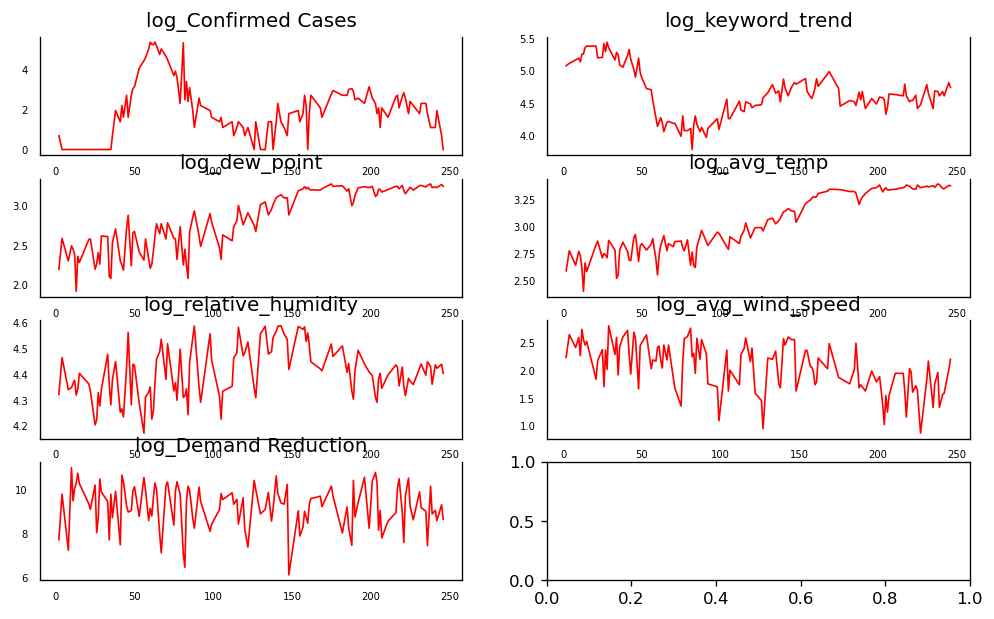

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [15]:
df.columns

Index(['log_Confirmed Cases', 'log_keyword_trend', 'log_dew_point',
       'log_avg_temp', 'log_relative_humidity', 'log_avg_wind_speed',
       'log_Demand Reduction'],
      dtype='object')

In [16]:
dft = df

In [17]:
dft

,log_Confirmed Cases,log_keyword_trend,log_dew_point,log_avg_temp,log_relative_humidity,log_avg_wind_speed,log_Demand Reduction
2,0.693147,5.081404,2.197225,2.595255,4.322807,2.230014,7.735872
4,0.000000,5.117994,2.587764,2.778819,4.464758,2.639057,9.813874
8,0.000000,5.170484,2.302585,2.646175,4.341205,2.406945,7.256167
10,0.000000,5.198497,2.493205,2.772589,4.348987,2.587764,11.027326
11,0.000000,5.141664,2.451005,2.734368,4.364372,2.261763,9.508306
...,...,...,...,...,...,...,...
239,1.098612,4.615121,3.230804,3.384390,4.361824,1.335001,8.910732
241,1.098612,4.682131,3.238678,3.349904,4.436752,1.568616,9.077145
242,1.945910,4.615121,3.230804,3.346389,4.423648,1.589235,8.605340
245,0.693147,4.820282,3.269569,3.377588,4.439116,2.014903,9.333976


In [18]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grang_test = grangers_causation_matrix(dft, variables = dft.columns)

In [19]:
grang_test[-1:7]

,log_Confirmed Cases_x,log_keyword_trend_x,log_dew_point_x,log_avg_temp_x,log_relative_humidity_x,log_avg_wind_speed_x,log_Demand Reduction_x
log_Demand Reduction_y,0.5767,0.016,0.0406,0.1468,0.0061,0.6373,1.0


In [20]:
#Out Grang Test suggest that the demand change is dependent mainly on footfall, confirmed cases and not weather factors

In [21]:
dft = df[['log_Confirmed Cases', 'log_keyword_trend',
       'log_dew_point', 'log_relative_humidity',
       'log_Demand Reduction']]

In [22]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(dft)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
log_Confirmed Cases ::  64.81     > 60.0627   =>   True
log_keyword_trend ::  35.47     > 40.1749   =>   False
log_dew_point ::  15.62     > 24.2761   =>   False
log_relative_humidity ::  6.49      > 12.3212   =>   False
log_Demand Reduction ::  0.67      > 4.1296    =>   False


In [23]:
# The Cointergation test is the basic premise of VAR model. In our case that only footfall, Demand Reductions and Confirmed cases 
# has a statistically significant relationships. Thus we proceed with the VAR model.

In [24]:
nobs = 2
df_train, df_test = dft[0:-nobs], dft[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(125, 5)
(2, 5)


In [25]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [26]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "log_Confirmed Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5422
 No. Lags Chosen       = 10
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.007. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "log_keyword_trend" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6486
 No. Lags Chosen       = 2
 Critical value 1%     = -3.485
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.4578. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "log_dew_point" 
    -----------------------------------------------
 Null Hypothesis: Dat

In [27]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [28]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "log_Confirmed Cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8173
 No. Lags Chosen       = 4
 Critical value 1%     = -3.487
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0027. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "log_keyword_trend" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.3702
 No. Lags Chosen       = 1
 Critical value 1%     = -3.485
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "log_dew_point" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Sta

In [29]:
# All the series are now stationary 

In [30]:
# # Second Differencing
# df_differenced = df_differenced.diff().dropna()

In [31]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in df_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [32]:
#### Selecting order of VAR model

In [34]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

C:\Users\Avinash Matani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 1
AIC :  -13.217387970377018
BIC :  -12.531489347115453
FPE :  1.8194059693742813e-06
HQIC:  -12.938777673319048 

Lag Order = 2
AIC :  -13.53320569222189
BIC :  -12.269097844186405
FPE :  1.329443130958065e-06
HQIC:  -13.019764205857369 

Lag Order = 3
AIC :  -13.465645590262803
BIC :  -11.617189031190577
FPE :  1.4299704739449445e-06
HQIC:  -12.714916911276177 

Lag Order = 4
AIC :  -13.340562873087498
BIC :  -10.90150759815321
FPE :  1.6374626614423218e-06
HQIC:  -12.350051271007477 

Lag Order = 5
AIC :  -13.263150870345735
BIC :  -10.227133608963392
FPE :  1.8006666984898244e-06
HQIC:  -12.030320100494803 

Lag Order = 6
AIC :  -13.222354193886858
BIC :  -9.582895577003994
FPE :  1.9275093098641527e-06
HQIC:  -11.74462669608781 

Lag Order = 7
AIC :  -13.063081495790602
BIC :  -8.813583134563284
FPE :  2.352432311016742e-06
HQIC:  -11.337837578945539 

Lag Order = 8
AIC :  -12.928441192893391
BIC :  -8.062182665507144
FPE :  2.847311072282191e-06
HQIC:  -10.95301820560

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

In [ ]:
## Training Var for selected order 9

In [35]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, Oct, 2020
Time:                     13:30:16
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -12.2691
Nobs:                     122.000    HQIC:                  -13.0198
Log likelihood:           14.9730    FPE:                1.32944e-06
AIC:                     -13.5332    Det(Omega_mle):     8.63397e-07
--------------------------------------------------------------------
Results for equation log_Confirmed Cases
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.022584         0.062123            0.364           0.716
L1.log_Confirmed Cases          -0.558058         0.093289           -5.982           0.000
L1

In [36]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

log_Confirmed Cases : 2.04
log_keyword_trend : 1.96
log_dew_point : 2.21
log_avg_temp : 2.25
log_relative_humidity : 2.1


In [ ]:
## The value of Serial correlation seems alright and we can now proceed with the forecast

In [ ]:
model_fitted.plot()

In [37]:
irf = model_fitted.irf(periods = 15)

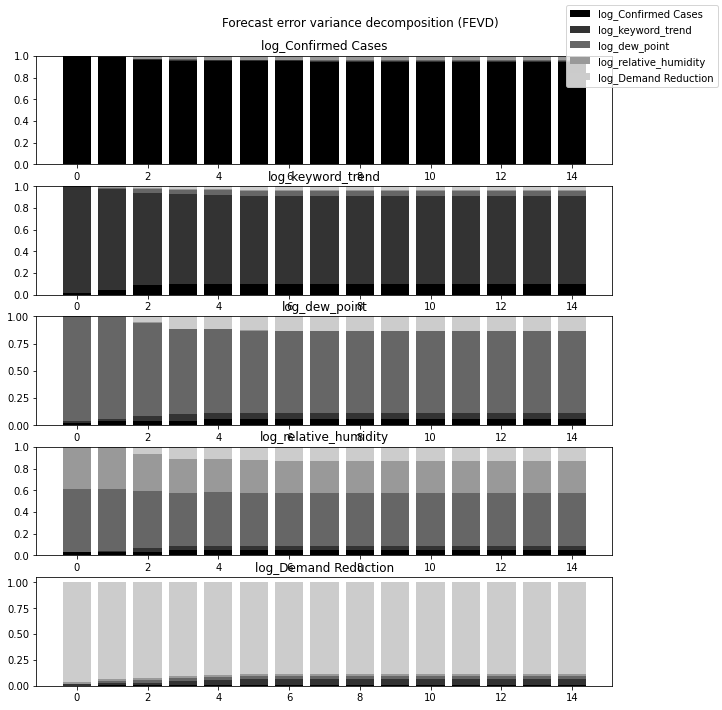

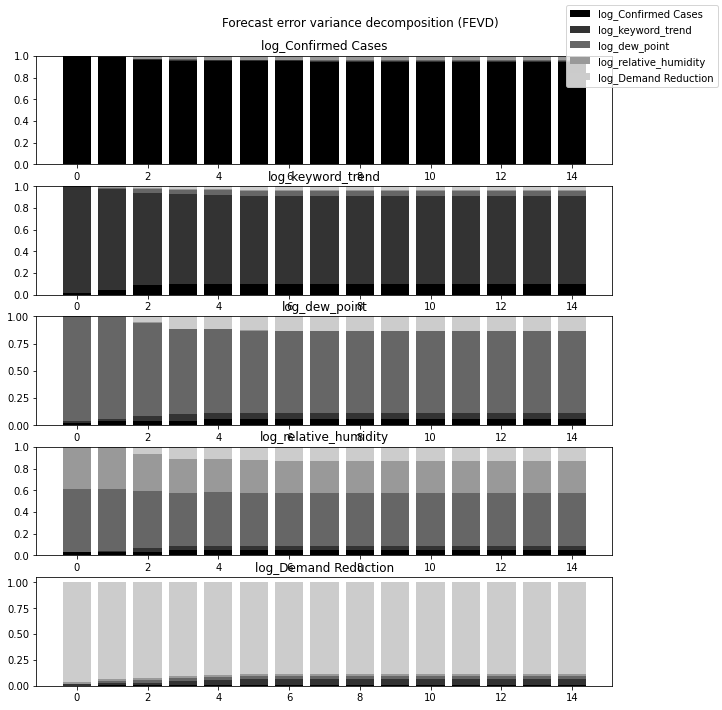

In [38]:
model_fitted.fevd(periods = 15).plot()

In [39]:
model_fitted.fevd(periods = 15).plot

<bound method FEVD.plot of <statsmodels.tsa.vector_ar.var_model.FEVD object at 0x0000024ED83A7E08>>

In [40]:
df_log.columns

Index(['log_Total Cases', 'log_Confirmed Cases', 'log_total_demand',
       'log_keyword_trend', 'log_dew_point', 'log_avg_temp',
       'log_relative_humidity', 'log_avg_wind_speed', 'log_Demand Reduction'],
      dtype='object')

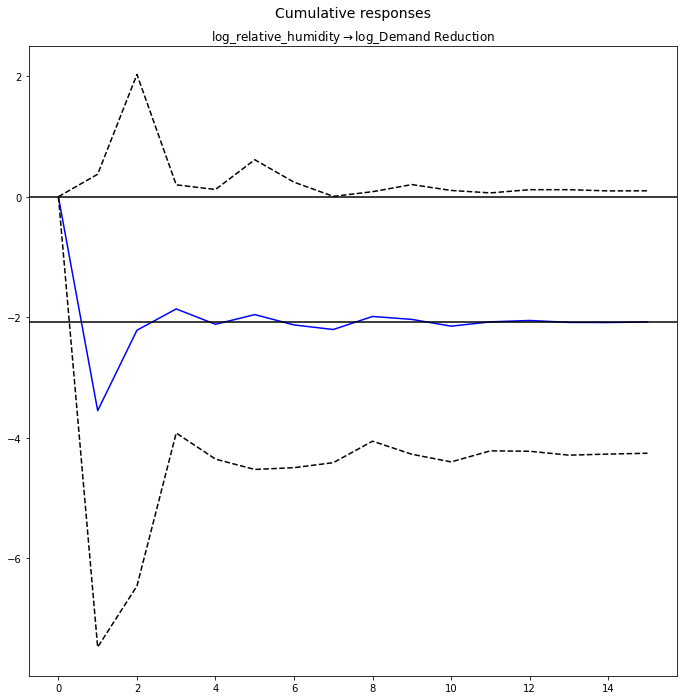

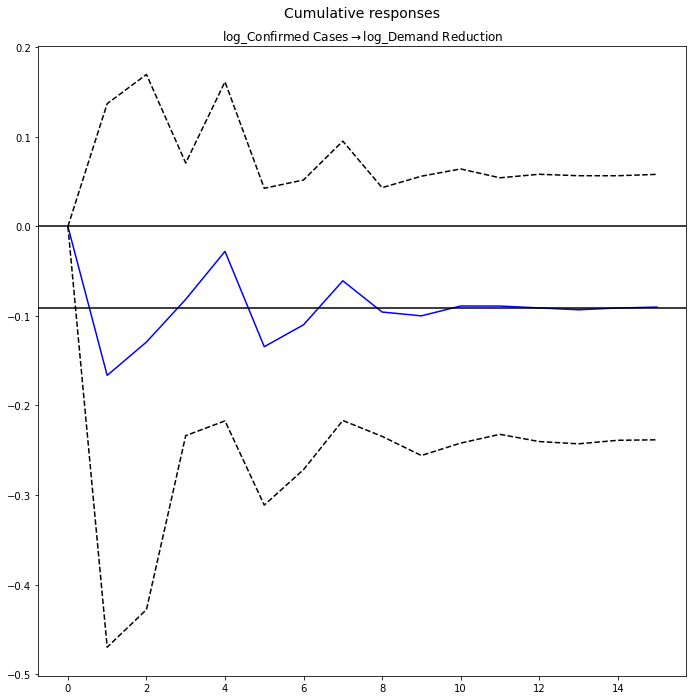

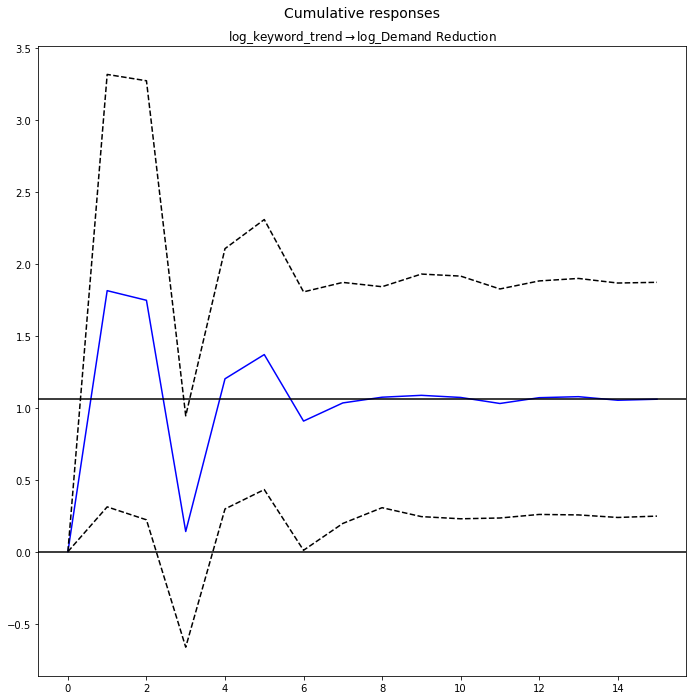

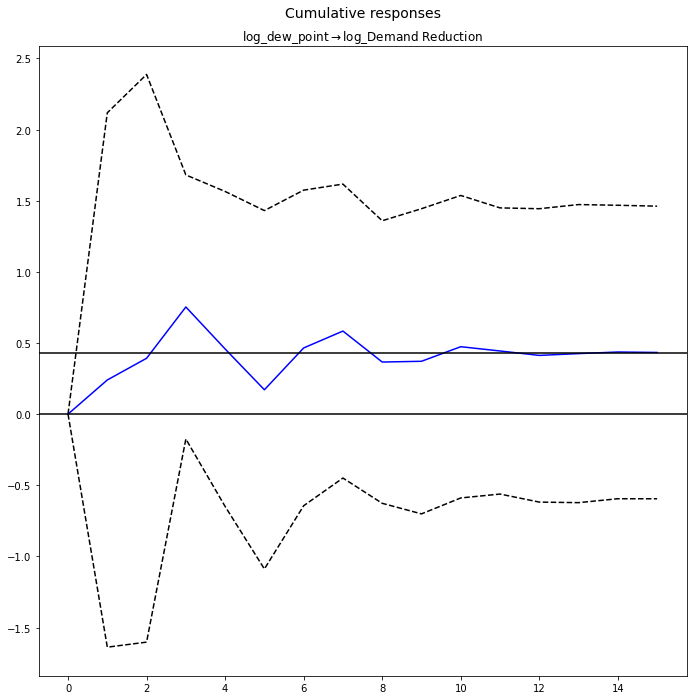

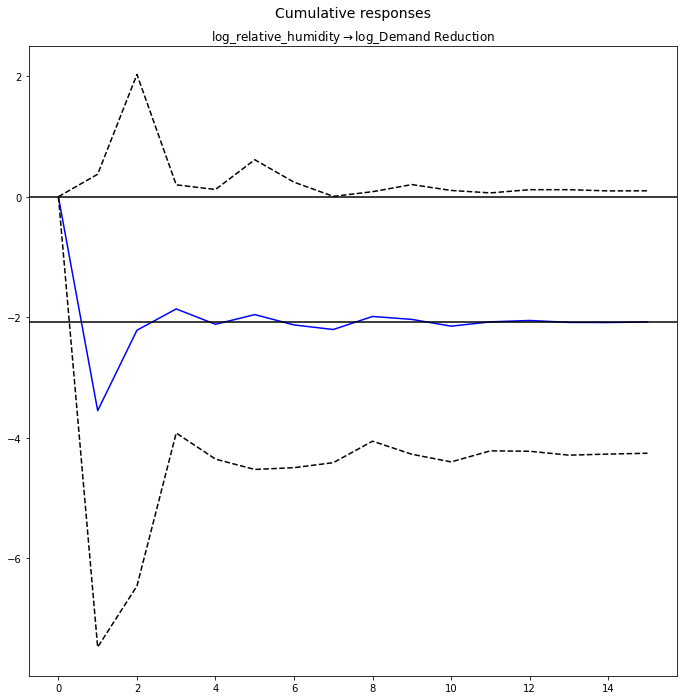

In [47]:
# Index(['log_Total Cases', 'log_Confirmed Cases', 'log_total_demand',
#        'log_keyword_trend', 'log_dew_point', 'log_avg_temp',
#        'log_relative_humidity', 'log_avg_wind_speed', 'log_Demand Reduction'],
#       dtype='object')
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_Confirmed Cases')
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_keyword_trend')
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_dew_point')
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_relative_humidity')

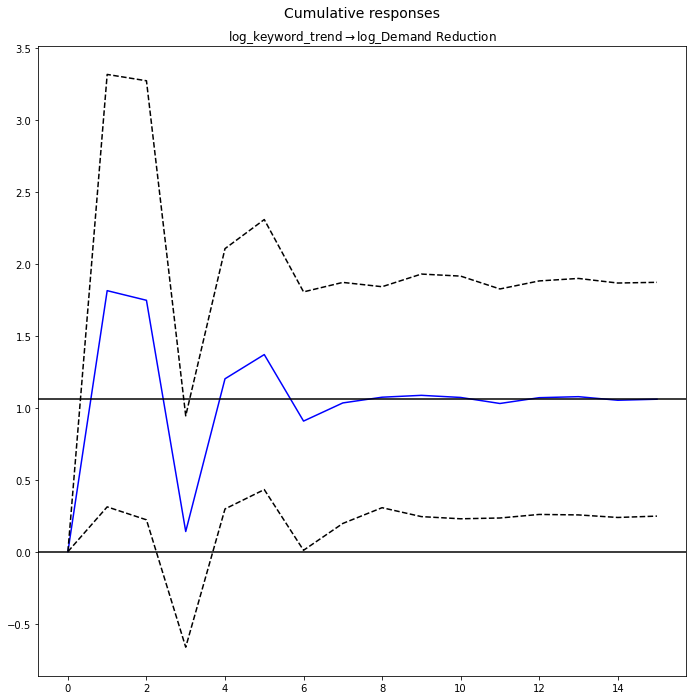

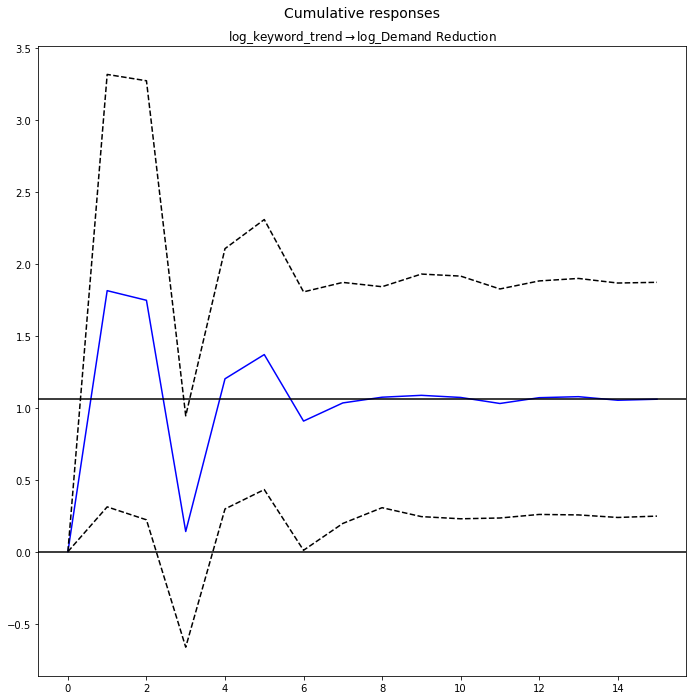

In [42]:
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_keyword_trend',orth=False)

In [ ]:
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_Confirmed Cases',orth=False)

In [ ]:
irf.plot_cum_effects(response = 'log_Demand Reduction', impulse = 'log_relative_humidity',orth=False)

In [ ]:
# print(irf.irfs)
print(irf.cum_effects)

In [ ]:
# def impulse_response(self):
#     # Note: The default impulse response figure is a bit different from the manuscript. In the default figure,
#     # (1) load decrease -> load reduction increase; (2) all impulses are 1% increase impulse
#     model.irf(periods=30).plot_cum_effects(impulse=1, response=0)  # covid case -> load reduction
#     plt.show()
#     model.irf(periods=30).plot_cum_effects(impulse=4, response=0)  # retail -> load reduction
#     plt.show()

In [ ]:
# model_fitted.impulse_response()

In [ ]:
# irf.plot(impulse='Demand Reduction')